![title](https://image.ibb.co/erDntK/logo2018.png)

---




# Task 4 - Layerwise Pretrained Neural Network


In this assignment you will practice putting together a simple image classification pipeline, based on the Multi-layer Neural Network classifier which is trained using Layerwise Pretraining Scheme. 

The goals of this assignment are as follows:

    * implement Deep Neural Network API
    * implement Layerwise Pretraining using Auto Encoder
    * compare a 4 layered tanh network trained from scratch and trained layerwise 


---
# [Part 0] Import libraries

In [0]:
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM = 1301160098
Nama = "Panji Bagaskara"

## --- end your code here ----

---

---
# [Part 1] Deep Neural Net API

For this exercise, we'll create a Deep Neural Net API which will automatically create deep layers for a given list of hidden layer

<font color='blue'>This part is exacly the same as **Task 3**</font>

---
## 1 - Basic Layer Functions

For this part, we've laready provide you the implementation of some basic layers

---
### a. Affine API


In [0]:
def affine_forward(x, W, b ):   

    v = np.dot(x, W) + b    
    cache = (x, W, b)
    
    return v, cache

In [0]:
def affine_backward(dout, cache):
    
    x, W, b = cache
    dW = np.dot(x.T,dout)
    db = np.sum(dout, axis=0, keepdims=True)
    dx = dout.dot(W.T)
    
    return dW, db, dx

### b. Tanh API

In [0]:
def tanh_forward(x):     
  
    out = np.tanh(x)
    cache = 1-out**2
    
    return out, cache

In [0]:
def tanh_backward(dout, cache):   
  
    dout = dout*cache
    
    return dout

### c. Softmax API

In [0]:
def softmax(x):  
  
    x -= np.max(x)
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)  
    score = x_exp / x_sum
    
    return score

In [0]:
def softmax_loss(score, y):
   
    num_examples = score.shape[0]
    number_list = range(num_examples)
    corect_logprobs = -np.log(score[number_list,y])
    loss = np.sum(corect_logprobs)/num_examples
    
    dscores = score
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    
    return loss, dscores

---
## 2 - Weight Init
Below is a function to repeatedly initialize weights and bias for each layer

In [0]:
def init_weights(d_in, hidden, d_out, std=1e-2, seed=None):
    """
    Inputs:
    - d_in  : int, number of input dimension
    - hidden: list of number hidden neuron in each hiidden layer
    - d_out : int, number of output dimension
    - std   : standar deviation for generating weights
    - seed  : random seed
    
    Outputs:
    - W: list of Weights
    - b: list of biases
    """
    
    W = []
    b = []
    np.random.seed(seed)
    dims = [d_in] + hidden + [d_out] 
    
    for i in range(len(dims)-1):
        W.append(std * np.random.randn(dims[i],dims[i+1]))
        b.append(np.zeros((1, dims[i+1])))
    return W, b

---
## 3 - Predict Function

Implement the predict function first, because we are going to use **predict** function inside the **training** function to track the **validation** accuracy 

<br>

The network architecture should be: 
<pre><b>Input - N * [FC Layer - activation] - FC Layer - argmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**

---

<font color='blue'>This part is exacly the same as **Task 3**

so if you have finished working on **Task 3**, just paste your answers here</font>

---

#### <font color='red'>**EXERCISE**: </font>
**Implement Predict Function**

    * loop call forward function for each hidden layer weights
    * check and use the requested activation funtion
    * call forward function for the last layer

In [0]:
def predict_multi_layer(X, W, b, act_f ='tanh'):    
    """
    Inputs:
    - X    : Input data, of shape(N, D)
    - W    : list of Weight
    - b    : list of biases
    - act_f: activation function ('tanh' or 'relu')
    
    Output:
    - y_pred : list of class prediction
    """
    
    
    y_pred = np.zeros(X.shape[1])
    n_layer = len(W)
    
    
    
    # first activation is X
    act = X
    
    ## ------------------------- start your code here -------------------------
    
    # loop i over n_layer-1
    for i in range(n_layer-1):
    
        # calculate layer score by calling affine forward function using act, W[i], and b[i]
        layer, _ = affine_forward(act, W[i], b[i])
  
        if ( act_f == 'tanh'):
            # calculate activation score by calling tanh forward function using layer score
            act, _ = tanh_forward(layer)
          
        else:
            # calculate activation score by calling relu forward function using layer score
            act, _ = relu_forward(layer)
          

    # calculate last layer score by calling affine forward function using act, W[-1], and b[-1]
    last_layer, _ = affine_forward(act, W[-1], b[-1])
    
    
    # take the maximum prediction from the last layer and use that column to get the class       
    # use np.argmax with axis=-1 
    y_pred = np.argmax(last_layer, axis=-1)

    ## ------------------------- end your code here -------------------------
    
    return y_pred

Check your implementation

---
## 4 - Training Function

Now let's complete the training function


<br>

The network architecture should be: 
<pre><b>Input -N * [FC Layer - activation] - FC Layer - Softmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**

---

<font color='blue'>This part is exacly the same as **Task 3**

so if you have finished working on **Task 3**, just paste your answers here</font>

---

<br>

#### <font color='red'>**EXERCISE**: </font>
**Implement Training Function**

there are **four steps** in this training function

---

**1. Forward Pass**

    * loop over hidden layer [for len(W)-1]
        * call affine forward function
        * call activation forward function
    * call affine forward function for the last layer
    * call softmax score function

**2. Calculate Loss**

    * call softmax_loss function
    * loop over weights [for W]
        * calculate loss with regularization


**3. Backward Pass**

    * call affine backward function for the last layer
    * loop over hidden layer [from len(W)-2 to 0]
        * call activation backward function
        * call affine backward function

**4. Weight Update**

    * loop over weights [for W]
        * implement weight update
    * calculate the training and validation accuracy

In [0]:
def train_multi_layer(X, y, X_val, y_val, hidden_size, act_f='tanh',
                      W=None, b=None, std=1e-4, seed=None,
                      lr=1e-4, lr_decay=0.95, reg=0.25, 
                      epochs=100, batch_size=200, verbose=True):
    """
    Inputs:
    - X          : array of train data, of shape (N, D)
    - y          : array of train labels, of shape (N,)
    - X_val      : array of validation data, of shape (Nv, D)
    - y_val      : array of validation labels, of shape (Nv,)
    - hidden_size: list of hidden neuron for each hidden layer
    - act_f      : activation function ('tanh' or 'relu')
    - W          : list of Weight, if W is None, it will be initialized
    - b          : list of biases, if W is None, bias will be initialized
    - std        : float, standar deviation for generating weights
    - seed       : int, initial random seed
    - lr         : float, initial learning rate
    - lr_decay   : float, 0-1, decay rate to reduce learning rate each epoch
    - reg        : float, regularization rate
    - epochs     : int, number of training epoch
    - batch_size : int, number of batch used each step
    - verbose    : boolean, verbosity
    
    Outputs:
    - W          : list of trained Weights
    - b          : list of trained biases
    - history    : list of training history [loss, train_acc, val_acc]
    
    """
    
    num_train, dim = X.shape
    
    
    # check if data train is divisible by batch size
    assert num_train % batch_size==0, "data train "+str(num_train)+" is not divisible by batch size"+str(batch_size)
    
    # total iteration per epoch
    num_iter = num_train // batch_size
    
    #start iteration counts
    it = 0
    
    # assume y takes values 0...K-1 where K is number of classes
    num_classes = np.max(y) + 1  
        
    # initialize Weights
    if W is None:
        W, b = init_weights(dim, hidden_size, num_classes, std, seed) 
        
    # number of layer (including output layer)
    n_layer = len(W)

    # Run stochastic gradient descent to optimize W
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    ## ------------------------- start your code here --------------------------

    print('start training using', act_f, 'activation function')
    for ep in range(epochs):
        # Shuffle data train index
        train_rows = np.arange(num_train)
        np.random.shuffle(train_rows)
        
        # split index into mini batches
        id_batch = np.split(train_rows, num_iter)
  
        for batch in id_batch:
      
            X_batch = X[batch]
            y_batch = y[batch]

            # store all cache in dictionary
            cache = {}

            # first layer activation input is X_batch
            act = X_batch

            # ------------------------------------------------------------------
            # 1. Forward Pass
            # ------------------------------------------------------------------

            # loop i over hidden layer (n_layer-1)
            # see predict function implementation
            for i in range(n_layer-1):

                # calculate layer score by calling affine forward function using activation act, W[i], and b[i]
                layer, cache_affine = affine_forward(act, W[i], b[i])


                if ( act_f == 'tanh'):
                    # calculate activation score by calling tanh forward function using layer score
                    act, _ = tanh_forward(layer)
                    
                else:
                    # calculate activation score by calling relu forward function using layer score
                    act, _ = relu_forward(layer)

                    
                # combine cache from affine and activation layer into cache for this layer
                cache[i] = (cache_affine, act)

            # calculate last layer score by calling affine forward function using activation act, W[i+1], and b[i+1]
            last_layer, cache[i+1] = affine_forward(act, W[i+1], b[i+1])

            # calculate softmax score by calling softmax function using last_layer output score
            softmax_score = softmax(last_layer)

            # ------------------------------------------------------------------
            # 2. Calculate Loss
            # ------------------------------------------------------------------

            # evaluate loss and gradient by calling softmax_loss function using input softmax_score and y_batch
            loss, dout = softmax_loss(softmax_score, y_batch)

            # add regularization to the loss:
            #    for each weights, calculate the sum square, multiply regularization strength
            #    then add it to the loss
            # see the implementation in the previous Task
            for w in W:
                # loss = loss + reg * sum(w*w)
                loss += reg*np.sum(w*w)  

            # append the loss history
            loss_history.append(loss)


            # ------------------------------------------------------------------
            # 3. Backward Pass
            # ------------------------------------------------------------------    

            # dictionary to contain all gradients
            dW = {}
            db = {}

            # calculate last weights gradient by calling affine backward function using dout and cache[n_layer-1]
            dW[n_layer-1], db[n_layer-1], dact = affine_backward(dout, cache[n_layer-1])

            #loop i from n_layer-2 down to 0
            for i in range(n_layer-2,-1,-1):

                # extract affine cache and activation cache from layer cache
                cache_affine, cache_act = cache[i]

                if ( act_f == 'tanh'):
                    # calculate tanh gradient by calling tanh backward function using dact and cache_act
                    dlayer = tanh_backward(dact, cache_act)
                    
                else:
                    # calculate relu gradient by calling relu backward function using dact and cache_act
                    dlayer = relu_backward(dact, cache_act)

                    
                # calculate layer weights gradient by calling affine backward function using dlayer and cache_affine
                dW[i], db[i], dact = affine_backward(dlayer, cache_affine)

                # add regularization to gradient
                dW[i] += 2 * reg * W[i]

            # ------------------------------------------------------------------
            # 4. Weight Update
            # ------------------------------------------------------------------    

            # perform parameter update by subtracting W[i] and b[i] for each layer with a fraction of dW[i] and db[i]
            # according to the learning rate
            # loop over W
            for i in range(len(W)):    
                # w_i = w_i - lr * dw_i
                W[i] -= lr * dW[i]
    
                # b_i = b_i - lr * db_i
                b[i] -= lr * db[i]


            # iteration count
            it +=1

            if verbose and it % 100 == 0:
                print ('iteration',it,'(epoch', ep+1,'/',epochs, '): loss =', loss)
              
            
        # At the end of one epoch
        # 1. Check accuracy
        #    calculate the training accuracy by calling predict_multi_layer function on X_batch
        #    and compare it to y_batch. Then calculate the mean correct (accuracy in range 0-1)
        train_acc = (predict_multi_layer(X_batch, W, b, act_f) == y_batch).mean()
        train_acc_history.append(train_acc)

        # 2. Calculate the training accuracy by calling predict_multi_layer function on X_val
        #    and compare it tu y_val. Then calculate the mean correct (accuracy in range 0-1)
        val_acc = (predict_multi_layer(X_val, W, b, act_f) == y_val).mean()
        val_acc_history.append(val_acc)

        # 3. Decay learning rate
        #    multiply learning rate with decay
        #    see sigmoid train function
        lr *= lr_decay
            
            
    ## ------------------------- end your code here ----------------------------
    
    history = [loss_history, train_acc_history, val_acc_history]
    
    if verbose:
      print('Training done')
    
    return W, b, history

---
---
# [Part 2] CIFAR-10 Dataset

Again, we'll use the CIFAR-10 dataset


## 1 - Load CIFAR-10

In [0]:
import tensorflow as tf

(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## 2 - Split Validation Data

In [0]:
X_val_ori = X_train_ori[-1000:,:]
y_val     = y_train[-1000:]

X_train_ori = X_train_ori[:-1000, :]
y_train     = y_train[:-1000]

## 3 - Normalize and Reshape Data

In [0]:
X_train = X_train_ori.astype('float32')
X_val = X_val_ori.astype('float32')
X_test = X_test_ori.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_val = X_val.reshape((X_val.shape[0],X_val.shape[1]*X_val.shape[2]*X_val.shape[3]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49000, 3072)
X_val.shape   = (1000, 3072)
X_test.shape  = (10000, 3072)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)


---
***
#[Part 3] Four Layer Tanh Network
* In this part, we'll train a **4-layered tanh network** and train it from scratch
* we'll use **200, 100, and 50 hidden neurons** for each hidden layers

---
## 1 - Train Network

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **three-hidden layer neural network** with **500, 100, and 50 hidden neurons** for each hidden layers using **tanh** activation function



In [0]:
hidden_size=[200, 100, 50]

t1 = time.time()

W_tanh, b_tanh, history_tanh = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    act_f = 'tanh',
    std=1e-2, lr=1e-2,
    lr_decay=0.95, reg=0.01, 
    epochs=30)

t2 = time.time()

time_scratch = (t2-t1)/60
print('time training from scratch: %0.2f minutes' % time_scratch)

start training using tanh activation function
iteration 100 (epoch 1 / 30 ): loss = 2.9173766534365657
iteration 200 (epoch 1 / 30 ): loss = 2.893223376436001
iteration 300 (epoch 2 / 30 ): loss = 2.870631563651382
iteration 400 (epoch 2 / 30 ): loss = 2.849393763667441
iteration 500 (epoch 3 / 30 ): loss = 2.829028360058465
iteration 600 (epoch 3 / 30 ): loss = 2.8105060482929103
iteration 700 (epoch 3 / 30 ): loss = 2.792049425211294
iteration 800 (epoch 4 / 30 ): loss = 2.77548559193798
iteration 900 (epoch 4 / 30 ): loss = 2.759683595071465
iteration 1000 (epoch 5 / 30 ): loss = 2.7442845030495295
iteration 1100 (epoch 5 / 30 ): loss = 2.730027503266636
iteration 1200 (epoch 5 / 30 ): loss = 2.7164750836544655
iteration 1300 (epoch 6 / 30 ): loss = 2.7034696077182585
iteration 1400 (epoch 6 / 30 ): loss = 2.6915823067895683
iteration 1500 (epoch 7 / 30 ): loss = 2.6795823129890195
iteration 1600 (epoch 7 / 30 ): loss = 2.668851449731184
iteration 1700 (epoch 7 / 30 ): loss = 2.6580

**Expected Output**:
<pre>
loss should start around 2.9 and end around 2.15 in about 5 minutes

---
## 2 - Visualize Training
Visualize the loss, and train-validation accuracy

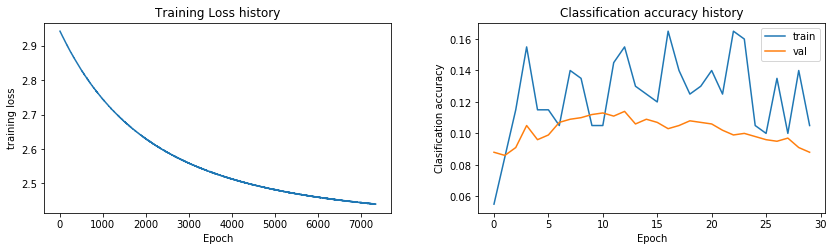

In [0]:
loss, train_acc, val_acc = history_tanh

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

---
## 3 - Training Accuracy
Calculate the loss, and train-validation accuracy

In [0]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_tanh, b_tanh, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

scratch_train_acc = accuracy*100
print('Training Accuracy = %0.2f%%' % scratch_train_acc)

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 11.50%
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [4 4 2 4 4 4 4 4 4 4 4 4 4 4 4]


**Expected Output**:

<pre>You should be able to get about <b>~22%</b> accuracy on training set using the initial run


In [0]:
y_pred = predict_multi_layer(X_val, W_tanh, b_tanh, act_f = 'tanh')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)


scratch_val_acc = accuracy*100
print('Validation Accuracy = %0.2f%%' % scratch_val_acc)

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 8.80%
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [4 4 2 4 4 4 4 4 4 4 4 4 4 4 4]


**Expected Output**:

<pre>You should also be able to get about <b>~22%</b> accuracy on validation set</pre>



---
***
# [Part 4] AutoEncoder API

**Autoencoder** is a neural network that is trained with the aim of copying input into output. 

The Autoencoder network consists of two parts: **Encoder** and **Decoder**. 

Initially, Autoencoder was used to reduce dimension or feature learning which in some cases succeeded in reducing dimensions better than PCA.

![img](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

---
## 1 - Training Function

Now let's complete the training function

For this exercise, we'll only use one layer Neural net for each Encoder and Decoder.

<br>

Thus, the network architecture should be: 
<pre><b>Input - <font color='blue'>[FC Layer - Tanh]</font> - <font color='red'>[FC Layer - Tanh]</font> - Reconstructed</b></pre>





<br>

#### <font color='red'>**EXERCISE**: </font>
**Implement Training Function**

there are **four steps** in this training function

---

**1. Forward Pass**

    * call affine forward function for encoder
    * call tanh forward function for encoder
    * call affine forward function for decoder
    * call tanh forward function for decoder

**2. Calculate Loss**

    * calculate Mean Squared Error Loss


**3. Backward Pass**

    * call tanh backward function for decoder
    * call affine backward function for decoder
    * call tanh backward function for encoder
    * call affine backward function for encoder

**4. Weight Update**

    * implement weight update

In [0]:
def train_autoencoder(X, reduction_size, W=None, b=None,
                      std=1e-4, seed=None, lr=1e-4, lr_decay=0.95,
                      epochs=100, batch_size=200, verbose=True):
    """
    Inputs:
    - X             : array of train data, of shape (N, D)
    - reduction_size: int, size of dimension reduction
    - W             : list of Weight, if W is None, it will be initialized
    - b             : list of biases, if W is None, bias will be initialized
    - std           : float, standar deviation for generating weights
    - seed          : int, initial random seed
    - lr            : float, initial learning rate
    - lr_decay      : float, 0-1, decay rate to reduce learning rate each epoch
    - reg           : float, regularization rate
    - epochs        : int, number of training epoch
    - batch_size    : int, number of batch used each step
    - verbose       : boolean, verbosity
    
    Outputs:
    - W             : list of trained Weights
    - b             : list of trained biases
    - history       : list of training history [loss, train_acc, val_acc]
    
    """
    
    num_train, dim = X.shape
    
    
    # check if data train is divisible by batch size
    assert num_train % batch_size==0, "data train "+str(num_train)+" is not divisible by batch size"+str(batch_size)
    
    # total iteration per epoch
    num_iter = num_train // batch_size
    
    #start iteration counts
    it = 0
        
    # initialize Weights
    if W is None:
        W, b = init_weights(dim, [reduction_size], dim, std, seed) 
        
    # Run stochastic gradient descent to optimize W
    loss_history = []
    
    
    ## ------------------------- start your code here -------------------------

    print('start training autoencoder, reducing to', reduction_size)
    
    for ep in range(epochs):
        # Shuffle data train index
        train_rows = np.arange(num_train)
        np.random.shuffle(train_rows)
        
        # split index into mini batches
        id_batch = np.split(train_rows, num_iter)
  
        for batch in id_batch:
      
            X_batch = X[batch]
        

            # ------------------------------------------------
            # 1. Forward Pass
            # ------------------------------------------------

            # calculate encoder layer score by calling affine forward function using input X_batch, W[0], and b[0]
            layer_encoder, cache_affine_e = affine_forward(X_batch, W[0], b[0])

            # calculate encoder activation score by calling tanh forward function using encoder layer score
            encoded, cache_act_e = tanh_forward(layer_encoder)
            
            # calculate decoder layer score by calling affine forward function using encoded activation, W[1], and b[1]
            layer_decoder, cache_affine_d = affine_forward(encoded, W[1], b[1])

            # calculate decoded output by calling tanh forward function using decoder layer score
            decoded, cache_act_d = tanh_forward(layer_decoder)
  


            # ------------------------------------------------
            # 2. Calculate Loss
            # ------------------------------------------------

            # evaluate loss and gradient using Mean Squared Error
            dout = decoded-X_batch
            loss = np.mean(dout**2)
            dout = dout/batch_size

            # append the loss history
            loss_history.append(loss)


            # ------------------------------------------------
            # 3. Backward Pass
            # ------------------------------------------------    

            # dictionary to contain all gradients
            dW = {}
            db = {}

            # calculate tanh gradient by calling tanh backward function using dout and cache_act_d
            dlayer_decoder = tanh_backward(dout, cache_act_d)

            # calculate layer weights gradient by calling affine backward function using dlayer_decoder and cache_affine_d
            dW[1], db[1], d_encoded = affine_backward(dlayer_decoder, cache_affine_d)
            
            # calculate tanh gradient by calling tanh backward function using d_encoded and cache_act_e
            dlayer_encoder = tanh_backward(d_encoded, cache_act_e)

            # calculate layer weights gradient by calling affine backward function using dlayer_encoder and cache_affine_e
            dW[0], db[0], dx = affine_backward(dlayer_encoder, cache_affine_e)


            # ------------------------------------------------
            # 4. Weight Update
            # ------------------------------------------------    

            # perform parameter update by subtracting W[i] and b[i] for each layer with a fraction of dW[i] and db[i]
            # according to the learning rate
            W[0] -= lr * dW[0]
            b[0] -= lr * db[0]
            W[1] -= lr * dW[1]
            b[1] -= lr * db[1]


            # iteration count
            it +=1

            if verbose and it % 100 == 0:
                print ('iteration',it,'(epoch', ep+1,'/',epochs, '): loss =', loss)
                
        # Decay learning rate
        #    multiply learning rate with decay
        lr *= lr_decay
            
            
    ## ------------------------- end your code here -------------------------
    
    if verbose:
      print('Training done')
    
    return W, b, loss_history

---
## 2 - Predict Function

The predict function is just a simple Single Layer Neural Network

<br>

The network architecture should be: 
<pre><b>Input - [FC Layer - Tanh]</b></pre>

And it will perform either **Encoder** or **Decoder** depending on the weights that passed


#### <font color='red'>**EXERCISE**: </font>
**Implement Predict Function**

    * call forward function 
    * call tanh forward funtion


In [0]:
def predict_autoencoder(X, W, b):
    
    # calculate layer score by calling affine forward function using input X, W, and b  
    layer, _ = affine_forward(X, W, b)

    # calculate activation score by calling tanh forward function using layer score
    act, _ = tanh_forward(layer)
    
    return act

---
***
#[Part 5] Layerwise Pretraining


In 2006, Geoffrey Hinton and Ruth Salakhutdinov successfully trained the Network with more than 10 layer architectures by training it layer-by-layer, one by one, using the **Restricted Boltzmann Machine** 

The RBMs are trained as feature extraction to understand the data represntation, and then merging the trained layers back into one network. 

Once stacked, the Network can be trained with Back-Propagation without worrying about experiencing **Vanishing Gradient Problems**

![img](https://image.ibb.co/eHq6Ae/mlenewimage14.png)

For this exercise, we'll use **AutoEncoder** to train the network layers since the implementations are easier than RBMs


To compare the network trained before, we'll train a 4-layered network,but now we train it using layerwise pretrain scheme.

We'll use the same **200, 100, and 50 hidden neurons** for each hidden layers

Each layer only trained for **5 epochs**

---
## 1 - Train First Layer 

First we train an **AutoEncoder** network to reduce image **[32,32,3]** into **200 dimensional feature space**

### Prepare Data

For this part, we need to prepare the data and normalize it into **[-1..1]** range

In [0]:
X_train_ae1 = X_train/127.5

### Train Layer

Use the AutoEncoder Training Function and train the first layer of **200 hidden neurons**  using **tanh** activation function



In [0]:
t1 = time.time()

W1, b1, hist1 = train_autoencoder(X_train_ae1, reduction_size=200,
                                  std=1e-3, lr=1e-3, 
                                  lr_decay=0.95,epochs=5)

t2 = time.time()

time_ae_1 = (t2-t1)/60
print('time training layer 1: %0.2f minutes' % time_ae_1)

start training autoencoder, reducing to 200
iteration 100 (epoch 1 / 5 ): loss = 0.1571872041545803
iteration 200 (epoch 1 / 5 ): loss = 0.13817468427617052
iteration 300 (epoch 2 / 5 ): loss = 0.12085064014956363
iteration 400 (epoch 2 / 5 ): loss = 0.10295319958758692
iteration 500 (epoch 3 / 5 ): loss = 0.10269714953375232
iteration 600 (epoch 3 / 5 ): loss = 0.10497086512999979
iteration 700 (epoch 3 / 5 ): loss = 0.08960441948234642
iteration 800 (epoch 4 / 5 ): loss = 0.09155501337201667
iteration 900 (epoch 4 / 5 ): loss = 0.08989442497550847
iteration 1000 (epoch 5 / 5 ): loss = 0.09533175526551248
iteration 1100 (epoch 5 / 5 ): loss = 0.08181989047882897
iteration 1200 (epoch 5 / 5 ): loss = 0.07770746522225502
Training done
time training layer 1: 2.29 minutes


**Expected Output**:
<pre>
loss should start around 0.15 and end around 0.08 in about 2 minutes

### Visualize Loss
Visualize the trining loss

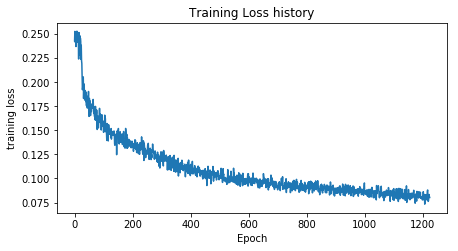

In [0]:
plt.rcParams['figure.figsize'] = [7, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.plot(hist1)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

---
## 2 - Train Second Layer 


Next we train the second **AutoEncoder** network to reduce input **200 dimensional feature space** into **100 dimensional feature space**

### Prepare Data

First we prepare the data by reducing all training data into 200 dimensional space using **Encoder** from the first network

In [0]:
X_train_ae2 = predict_autoencoder(X_train_ae1, W1[0], b1[0])

print('Original shape:', X_train_ae1.shape)
print('Reducted shape:', X_train_ae2.shape)

Original shape: (49000, 3072)
Reducted shape: (49000, 200)


**Expected Output**:
<pre>
 Original shape: (49000, 3072)
 Reducted shape: (49000, 200)


### Train Layer

Use the AutoEncoder Training Function and train the second layer of **100 hidden neurons**  using **tanh** activation function



In [0]:
t1 = time.time()

W2, b2, hist2 = train_autoencoder(X_train_ae2, reduction_size=100,
                                  std=1e-3, lr=1e-3, 
                                  lr_decay=0.95,epochs=5)

t2 = time.time()

time_ae_2 = (t2-t1)/60
print('time training layer 2: %0.2f minutes' % time_ae_2)

start training autoencoder, reducing to 100
iteration 100 (epoch 1 / 5 ): loss = 0.39534669487001245
iteration 200 (epoch 1 / 5 ): loss = 0.3980637059903317
iteration 300 (epoch 2 / 5 ): loss = 0.3956208022296859
iteration 400 (epoch 2 / 5 ): loss = 0.3299471368949084
iteration 500 (epoch 3 / 5 ): loss = 0.31498843077816485
iteration 600 (epoch 3 / 5 ): loss = 0.29357042527551996
iteration 700 (epoch 3 / 5 ): loss = 0.2706074627142376
iteration 800 (epoch 4 / 5 ): loss = 0.2377831459143972
iteration 900 (epoch 4 / 5 ): loss = 0.23531778512233167
iteration 1000 (epoch 5 / 5 ): loss = 0.22309974748612102
iteration 1100 (epoch 5 / 5 ): loss = 0.18263346707735675
iteration 1200 (epoch 5 / 5 ): loss = 0.17267595201681407
Training done
time training layer 2: 0.13 minutes


**Expected Output**:
<pre>
loss should start around 0.4 and end around 0.18 in about 7 seconds

### Visualize Loss
Visualize the trining loss

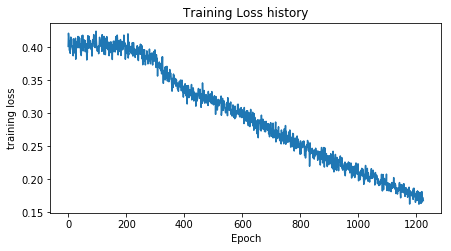

In [0]:
plt.rcParams['figure.figsize'] = [7, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.plot(hist2)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

---
## 3 - Train Third Layer


Next we train the third **AutoEncoder** network to reduce input even further from **100 dimensional feature space** into **50 dimensional feature space**

### Prepare Data

First we prepare the data by reducing all training data into 100 dimensional space using **Encoder** from the second network

In [0]:
X_train_ae3 = predict_autoencoder(X_train_ae2, W2[0], b2[0])

print('Original shape:', X_train_ae2.shape)
print('Reducted shape:', X_train_ae3.shape)

Original shape: (49000, 200)
Reducted shape: (49000, 100)


**Expected Output**:
<pre>
 Original shape: (49000, 200)
 Reducted shape: (49000, 100)


### Train Layer

Use the AutoEncoder Training Function and train the third layer of **50 hidden neurons**  using **tanh** activation function



In [0]:
t1 = time.time()

W3, b3, hist3 = train_autoencoder(X_train_ae3, reduction_size=50,
                                  std=1e-3, lr=1e-3, 
                                  lr_decay=0.95,epochs=5)

t2 = time.time()

time_ae_3 = (t2-t1)/60
print('time training layer 3: %0.2f minutes' % time_ae_3)

start training autoencoder, reducing to 50
iteration 100 (epoch 1 / 5 ): loss = 0.2530286130401775
iteration 200 (epoch 1 / 5 ): loss = 0.2489118250557446
iteration 300 (epoch 2 / 5 ): loss = 0.2643108481786424
iteration 400 (epoch 2 / 5 ): loss = 0.2510705814099041
iteration 500 (epoch 3 / 5 ): loss = 0.25136194046266863
iteration 600 (epoch 3 / 5 ): loss = 0.24240250231581403
iteration 700 (epoch 3 / 5 ): loss = 0.21644670937526309
iteration 800 (epoch 4 / 5 ): loss = 0.19382594649197563
iteration 900 (epoch 4 / 5 ): loss = 0.1750863287837915
iteration 1000 (epoch 5 / 5 ): loss = 0.16661752213479752
iteration 1100 (epoch 5 / 5 ): loss = 0.1544901222922617
iteration 1200 (epoch 5 / 5 ): loss = 0.147286461718044
Training done
time training layer 3: 0.05 minutes


**Expected Output**:
<pre>
loss should start around 0.25 and end around 0.14 in about 3 seconds

### Visualize Loss
Visualize the trining loss

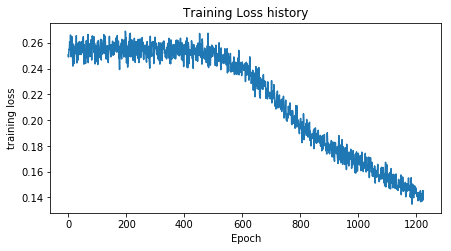

In [0]:
plt.rcParams['figure.figsize'] = [7, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.plot(hist3)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

---
## 4 - Train Last Layer


Lastly we train the last **AutoEncoder** network to reduce input from **50 dimensional feature space** into **10 dimensional class**

### Prepare Data

First we prepare the data by reducing all training data into 50 dimensional space using **Encoder** from the third network

In [0]:
X_train_ae4 = predict_autoencoder(X_train_ae3, W3[0], b3[0])

print('Original shape:', X_train_ae3.shape)
print('Reducted shape:', X_train_ae4.shape)

Original shape: (49000, 100)
Reducted shape: (49000, 50)


**Expected Output**:
<pre>
 Original shape: (49000, 100)
 Reducted shape: (49000, 60)


### Train Layer

Use the AutoEncoder Training Function and train the last layer of **10 output neuron**  using **tanh** activation function



In [0]:
t1 = time.time()

W4, b4, hist4 = train_autoencoder(X_train_ae4, reduction_size=50,
                                  std=1e-3, lr=1e-3, 
                                  lr_decay=0.95,epochs=5)

t2 = time.time()

time_ae_4 = (t2-t1)/60
print('time training layer 4: %0.2f minutes' % time_ae_4)

start training autoencoder, reducing to 50
iteration 100 (epoch 1 / 5 ): loss = 0.17280956310212245
iteration 200 (epoch 1 / 5 ): loss = 0.16250285534267686
iteration 300 (epoch 2 / 5 ): loss = 0.1461842005924299
iteration 400 (epoch 2 / 5 ): loss = 0.14603476312693597
iteration 500 (epoch 3 / 5 ): loss = 0.15063182821550206
iteration 600 (epoch 3 / 5 ): loss = 0.15577349938309099
iteration 700 (epoch 3 / 5 ): loss = 0.1626959101081755
iteration 800 (epoch 4 / 5 ): loss = 0.13238860215220372
iteration 900 (epoch 4 / 5 ): loss = 0.1310194111274205
iteration 1000 (epoch 5 / 5 ): loss = 0.11214944440276822
iteration 1100 (epoch 5 / 5 ): loss = 0.08315404092358192
iteration 1200 (epoch 5 / 5 ): loss = 0.06738470885627194
Training done
time training layer 4: 0.03 minutes


**Expected Output**:
<pre>
loss should start around 0.17 and end around 0.07 in about 2 seconds

### Visualize Loss
Visualize the trining loss

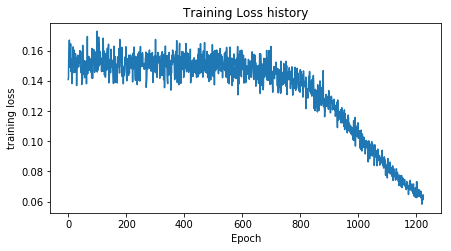

In [0]:
plt.rcParams['figure.figsize'] = [7, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.plot(hist4)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

---
***
#[Part 6] Four Layer Pretrained Tanh Network

After all layers are trained, now we retrieve all **encoder** weights from each layer and combine it into one complete **4-Layer Tanh Network**, then we train it once more using Supervised Backpropagation

---
### 1 - Get Weights

Get first Weights and biases (**Encoder Weights and biases**) form each layer, and combine them

In [0]:
W_ae = [W1[0], W2[0], W3[0], W4[0]]
b_ae = [b1[0], b2[0], b3[0], b4[0]]

## 2 - Train Network

Train the 4-Layer Pretrained Tanh Network for just **10 epochs**

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **three-hidden layer neural network** with **500, 100, and 50 hidden neurons** for each hidden layers using **tanh** activation function



In [0]:
t1 = time.time()

W_ae, b_ae, history_ae = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=[], 
    W = W_ae, b = b_ae,
    act_f = 'tanh',
    std=1e-2, lr=1e-2,
    lr_decay=0.95, reg=0.01, 
    epochs=10)

t2 = time.time()

time_merged = (t2-t1)/60
print('time training merged: %0.2f minutes' % time_merged)



start training using tanh activation function
iteration 100 (epoch 1 / 10 ): loss = 3.9103654750294607
iteration 200 (epoch 1 / 10 ): loss = 3.668107059438628
iteration 300 (epoch 2 / 10 ): loss = 3.504648961448952
iteration 400 (epoch 2 / 10 ): loss = 3.4293214722803245
iteration 500 (epoch 3 / 10 ): loss = 3.41941974900887
iteration 600 (epoch 3 / 10 ): loss = 3.3993374350262715
iteration 700 (epoch 3 / 10 ): loss = 3.4223784906716768
iteration 800 (epoch 4 / 10 ): loss = 3.4205324483436237
iteration 900 (epoch 4 / 10 ): loss = 3.4455497142165243
iteration 1000 (epoch 5 / 10 ): loss = 3.5830218034001784
iteration 1100 (epoch 5 / 10 ): loss = 4.093023149804551
iteration 1200 (epoch 5 / 10 ): loss = 4.488840074323855
iteration 1300 (epoch 6 / 10 ): loss = 4.988612082396759
iteration 1400 (epoch 6 / 10 ): loss = 5.627719505748316
iteration 1500 (epoch 7 / 10 ): loss = 6.456046985438141
iteration 1600 (epoch 7 / 10 ): loss = 7.347632839280132
iteration 1700 (epoch 7 / 10 ): loss = 8.1338

**Expected Output**:
<pre>
loss should start around 3.8 and end around 2.6 in less than 2 minutes

You can see that the total time spent in the pre-training scheme is almost the same as the training process from the scratch

In [0]:
print('time training from scratch: %0.2f minutes' % time_scratch)

total_time = time_ae_1 + time_ae_2 + time_ae_3 + time_ae_4 + time_merged
print('total time pretrain scheme: %0.2f minutes' % total_time)

time training from scratch: 5.89 minutes
total time pretrain scheme: 4.49 minutes


---
## 3 - Visualize Training
Visualize the loss, and train-validation accuracy

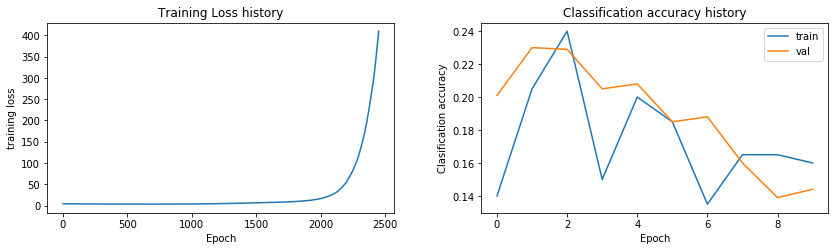

In [0]:
loss, train_acc, val_acc = history_ae

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

---
## 4 - Training Accuracy
Calculate the loss, and train-validation accuracy

In [0]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_ae, b_ae, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

pre_train_acc = accuracy*100
print('Training Accuracy Pretraining = %0.2f%%' % pre_train_acc)
print('Training Accuracy From Scratch= %0.2f%%' % scratch_train_acc)


Training Accuracy Pretraining = 14.91%
Training Accuracy From Scratch= 11.50%


**Expected Output**:

<pre>You should be able to get about <b>~33%</b> accuracy on training set using the initial run. 
10% higher than training from scratch

In [0]:
y_pred = predict_multi_layer(X_val, W_ae, b_ae, act_f = 'tanh')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)

pre_val_acc = accuracy*100

print('Validation Accuracy Pretraining = %0.2f%%' % pre_val_acc)
print('Validation Accuracy From Scratch= %0.2f%%' % scratch_val_acc)

Validation Accuracy Pretraining = 14.40%
Validation Accuracy From Scratch= 8.80%


**Expected Output**:

<pre>You should also be able to get about <b>~34%</b> accuracy on validation set.
10% higher than training from scratch



---

# Congratulation, You've Completed Exercise 4

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)